<a href="https://colab.research.google.com/github/pritam526/python-codes/blob/master/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preparation and Cleaning
Let's load the CSV files using the Pandas library. We'll use the name matches_raw_df for the data frame, to indicate that this is unprocessed data that which we might clean, filter and modify to prepare a data frame that's ready for analysis.

We will read the matches.csv file using read_csv()

In [7]:
matches_raw_df =pd.read_csv('matches.csv') 

In [8]:
matches_raw_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
 matches_raw_df.shape ##Dataset has 756 rows and 18 columns

(756, 18)

In [10]:
matches_raw_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [11]:
len(matches_raw_df.columns)

18

In [12]:
matches_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [13]:
#Using isnull() to find the columns having null values
#Using sum() to find the total no. of null values for each column
matches_raw_df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [14]:
matches_raw_df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [15]:
#Few stats about columns with integer type data
matches_raw_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000



For our analysis, umpire3 column isn't needed. So we will drop the column using drop() by passing the column name and axis value.

In [16]:
matches_df = matches_raw_df.drop('umpire3', axis = 1)

In [17]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


We will use matches_df for our analysis from here on.

## Lets plot some Graph and Visualization.

In [19]:
matches_per_season = matches_df.groupby('Season').id.count()

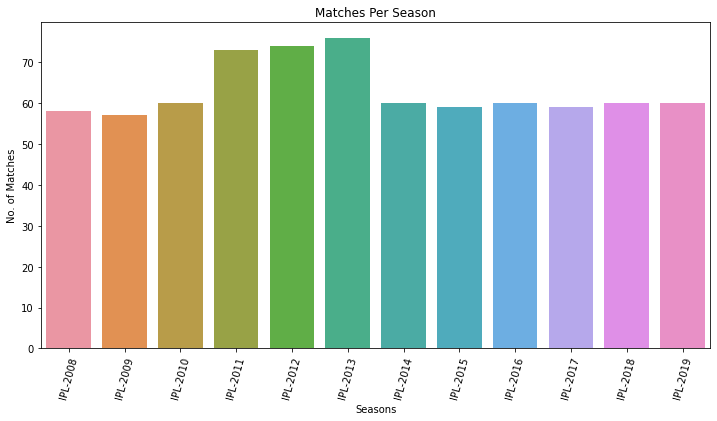

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Matches Per Season')
match_per_season_plot = sns.barplot(x = matches_per_season.index, y = matches_per_season)
match_per_season_plot.set(xlabel = 'Seasons', ylabel = 'No. of Matches');

Each season, almost 60 matches have been played. However, we see a spike in the number of matches from 2011 to 2013. This is due to the fact that two new franchises, Pune Warrior and Kochi Tuskers Kerala were introduced, increasing the number of teams to 10.

However, Kochi was removed in the very next season, while Pune Warriors were removed in 2013, bringing the number down to 8 from 2014.

Before the start of 2016 season, two teams, Chennai Super Kings and Rajasthan Royals were banned for two seasons. To make up for them two new teams, Rising Pune Supergiants and Gujarat Lions entered the competition.

When Chennai Super Kings and Rajasthan Royals returned, these two teams were removed from the competition.

# Toss

One of the most significant happenings in any cricket match is the toss, which happens at the very start of a match. The toss winner can choose whether he wants to bat first or second. Let's see what teams have chosen to do across differrent seasons after winning the toss.

We will again group the rows by season and then count the different values of toss_decision by using value_counts(). To find the percentage, we will divide the above result with matches_per_season

In [22]:
toss_decision_percentage = matches_df.groupby('Season').toss_decision.value_counts().sort_index() / matches_per_season * 100

In [23]:
toss_decision_percentage

Season    toss_decision
IPL-2008  bat              44.827586
          field            55.172414
IPL-2009  bat              61.403509
          field            38.596491
IPL-2010  bat              65.000000
          field            35.000000
IPL-2011  bat              34.246575
          field            65.753425
IPL-2012  bat              50.000000
          field            50.000000
IPL-2013  bat              59.210526
          field            40.789474
IPL-2014  bat              31.666667
          field            68.333333
IPL-2015  bat              42.372881
          field            57.627119
IPL-2016  bat              18.333333
          field            81.666667
IPL-2017  bat              18.644068
          field            81.355932
IPL-2018  bat              16.666667
          field            83.333333
IPL-2019  bat              16.666667
          field            83.333333
dtype: float64

In [24]:
toss_decision_percentage.index

MultiIndex([('IPL-2008',   'bat'),
            ('IPL-2008', 'field'),
            ('IPL-2009',   'bat'),
            ('IPL-2009', 'field'),
            ('IPL-2010',   'bat'),
            ('IPL-2010', 'field'),
            ('IPL-2011',   'bat'),
            ('IPL-2011', 'field'),
            ('IPL-2012',   'bat'),
            ('IPL-2012', 'field'),
            ('IPL-2013',   'bat'),
            ('IPL-2013', 'field'),
            ('IPL-2014',   'bat'),
            ('IPL-2014', 'field'),
            ('IPL-2015',   'bat'),
            ('IPL-2015', 'field'),
            ('IPL-2016',   'bat'),
            ('IPL-2016', 'field'),
            ('IPL-2017',   'bat'),
            ('IPL-2017', 'field'),
            ('IPL-2018',   'bat'),
            ('IPL-2018', 'field'),
            ('IPL-2019',   'bat'),
            ('IPL-2019', 'field')],
           names=['Season', 'toss_decision'])

In [25]:
toss_decision_percentage.unstack()

toss_decision,bat,field
Season,,
IPL-2008,44.827586,55.172414
IPL-2009,61.403509,38.596491
IPL-2010,65.000000,35.000000
IPL-2011,34.246575,65.753425
IPL-2012,50.000000,50.000000
IPL-2013,59.210526,40.789474
IPL-2014,31.666667,68.333333
IPL-2015,42.372881,57.627119
IPL-2016,18.333333,81.666667


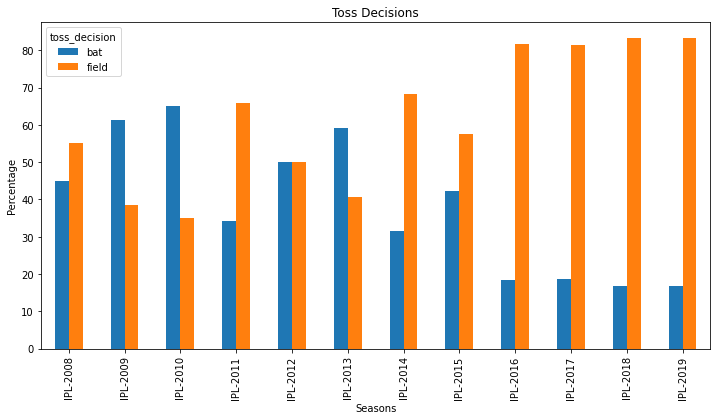

In [26]:
toss_decision_percentage.unstack().plot(kind = 'bar', figsize=(12,6), title = 'Toss Decisions', xlabel = 'Seasons', ylabel = 'Percentage');

Interesting!

For 2008-2013, teams seem to have been favouring both batting first and second. For this period, the percentage of times batting first was chosen is more in seasons 2009, 2010 and 2013. While fielding was chosen more in 2008 and 2011. Things were even stevens for 2012.

This could be put to the fact that IPL and T20 cricket in general was in its budding stages. So, teams were probably learning and trying to figure out which would favour them.

However, since 2014, teams have overwhelmingly chosen to bat second. Especially since 2016, teams have chosen to field for more than 80% of the times.

With the use of data analysis and an incresing trend in ODIs to bat second as there is a fixed target to achieve, teams chose more and more to bat first. This made the batsmen tasks easier as they could now have a clear thought of how to scale the target put in front of them.

# WINS

We saw how teams in the recent past have chosen to bat second more than 4 out of 5 times. Did this decision of theirs tranformed in results? Let's see

We will filter the dataframe using the required conditions, then grouping them by season and finding the count of winners.

In [27]:
filter1 = (matches_df.win_by_wickets == 0) & (matches_df.result == 'normal') 

In [29]:
wins_batting_first = matches_df[filter1].groupby('Season').winner.count() / matches_per_season * 100

In [30]:
filter2 = (matches_df.win_by_runs == 0) & (matches_df.result == 'normal')

In [31]:
wins_fielding_first = matches_df[filter2].groupby('Season').winner.count() / matches_per_season * 100

In [32]:
combined_wins_df = pd.concat([wins_batting_first, wins_fielding_first], axis = 1)
combined_wins_df.columns = ['batting_first', 'fielding_first']
combined_wins_df

,batting_first,fielding_first
Season,,
IPL-2008,41.379310,58.620690
IPL-2009,47.368421,50.877193
IPL-2010,51.666667,46.666667
IPL-2011,45.205479,53.424658
IPL-2012,45.945946,54.054054
IPL-2013,48.684211,48.684211
IPL-2014,36.666667,61.666667
IPL-2015,54.237288,40.677966
IPL-2016,35.000000,65.000000


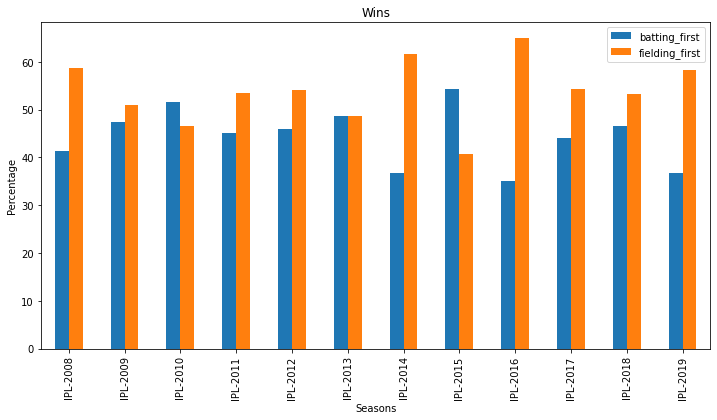

In [33]:
combined_wins_df.plot(kind = 'bar', figsize=(12,6), title = 'Wins', xlabel = 'Seasons', ylabel = 'Percentage');

# Team History

In leagues across different sports, there is always a talk about teams with "history" as in teams that have played the most in the league and continue to do so. Let's find such teams in the IPL.

We will count the different values for team1 and team2 using value_counts() and sort them in descending order using sort_values()

In [34]:
total_matches_played = (matches_df.team2.value_counts() + matches_df.team1.value_counts()).sort_values(ascending = False)
total_matches_played

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64

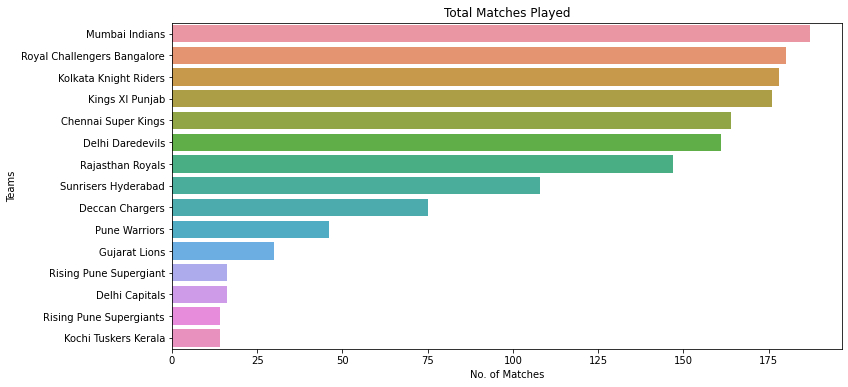

In [35]:
plt.figure(figsize=(12,6))
plt.title('Total Matches Played')
total_matches_played_plot = sns.barplot(y = total_matches_played.index, x = total_matches_played)
total_matches_played_plot.set(ylabel = 'Teams', xlabel = 'No. of Matches');

Mumbai Indians are the team that have played the most number of matches. They are followed by Royal Challengers Bangalore, Kolkata Knight Riders, Kings XI Punjab and Chennai Super Kings.

Chennai Super Kings and Rajasthan Royals could have been higher had they not been banned.

You will see there are two teams from Delhi, Delhi Daredevils and Delhi Capitals. This is due to the change in owners and team name in 2018.

Similar story for Deccan Chargers and Sunrisers Hyderabad with Deccan Chargers being removed from IPL from 2013 and Sunrisers coming in their place.

Also, there are two teams with almost same names. Rising Pune Supergiants and Rising Pune Supergiant. Well, they are same teams, no owners change. But it is more to do with superstitions.

In the 2016 season, Rising Pune Supergiants finished 7th. The owners changed the captain for 2017 as well as dropped the 's' from Supergiants. Well, it paid off as they finished as runner-up that season!!!

# Team Which Won Most Number Of matches.

In [36]:
most_wins = matches_df.winner.value_counts()

In [37]:
most_wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [38]:
win_percentage = (most_wins / total_matches_played).sort_values(ascending = False) * 100
win_percentage

Rising Pune Supergiant         62.500000
Delhi Capitals                 62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64

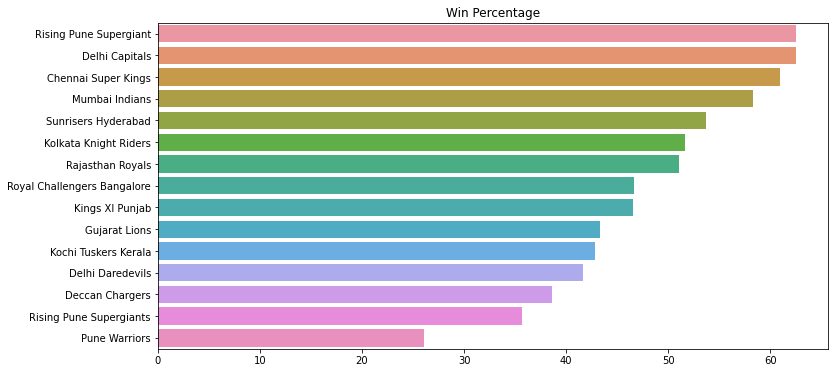

In [39]:
plt.figure(figsize=(12,6))
plt.title('Win Percentage')
win_percentage_plot = sns.barplot(y = win_percentage.index, x = win_percentage)
total_matches_played_plot.set(ylabel = 'Teams', xlabel = 'Percentage');

Rising Pune Supergiant and Delhi Capitals have the highest win percentage. This is largely due to the fact that they have played really few matches. Especially, Rising Pune Supergiant, who technically beacame a new team after leaving out the 's'.

Chennai Super Kings despite playing two less seasons than Mumbai Indians had only 9 less victories. They, along with Mumbai Indians are the only two teams in top 5 that were also part of IPL in 2008.

Chennai and Mumbai are the teams with legacy.

# **Who has been the Winners of Ipl.**

Using groupby() to group the rows according to seasons.

Find the last match of each season i.e the final using tail(1).

Sort the values as per season using sort_index().

Count the different winners and the times they won using value_counts() on winner.

In [43]:
ipl_win = matches_df.groupby('Season').tail(1).sort_values('Season', ascending = True)
ipl_win

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel
233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel
380,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel
456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel
516,517,IPL-2014,Bangalore,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
575,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth
635,636,IPL-2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi


In [44]:
ipl_winners = ipl_win.winner.value_counts()
ipl_winners

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: winner, dtype: int64

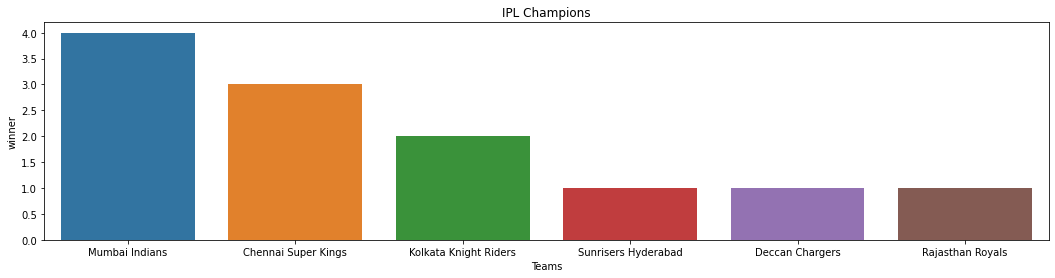

In [45]:
plt.figure(figsize=(18, 4))
plt.xlabel('Teams')
plt.ylabel('No. of Times')
plt.title('IPL Champions')
sns.barplot( x  = ipl_winners.index, y = ipl_winners);

Which has been the most and least consistent teams across all seasons ?

Use crosstab() to create a data frame between different values of winner and season.

Plot the same as a heatmap.

In [47]:
matches_won_each_season = pd.crosstab(matches_df['winner'], matches_df['Season'])

In [48]:
matches_won_each_season

Season,IPL-2008,IPL-2009,IPL-2010,IPL-2011,IPL-2012,IPL-2013,IPL-2014,IPL-2015,IPL-2016,IPL-2017,IPL-2018,IPL-2019
winner,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,10
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6,5,0
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11


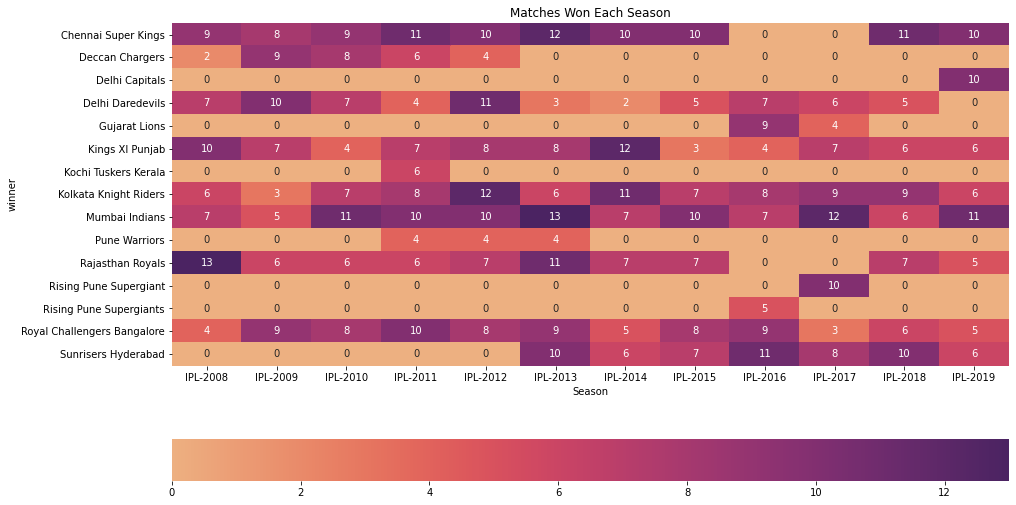

In [51]:
plt.figure(figsize=(15, 9))
plt.xlabel('Seasons')
plt.ylabel('Teams')
plt.title('Matches Won Each Season')
sns.heatmap(matches_won_each_season, annot = True, cmap = 'flare', fmt = 'd', cbar_kws={"orientation": "horizontal"});

## Which Teams Won Most Number Of Tosses Over Seasons.

Using groupby() to group the rows according to seasons.

Find the different toss winners and how many times they won for every season by using value_counts() on toss_winner.

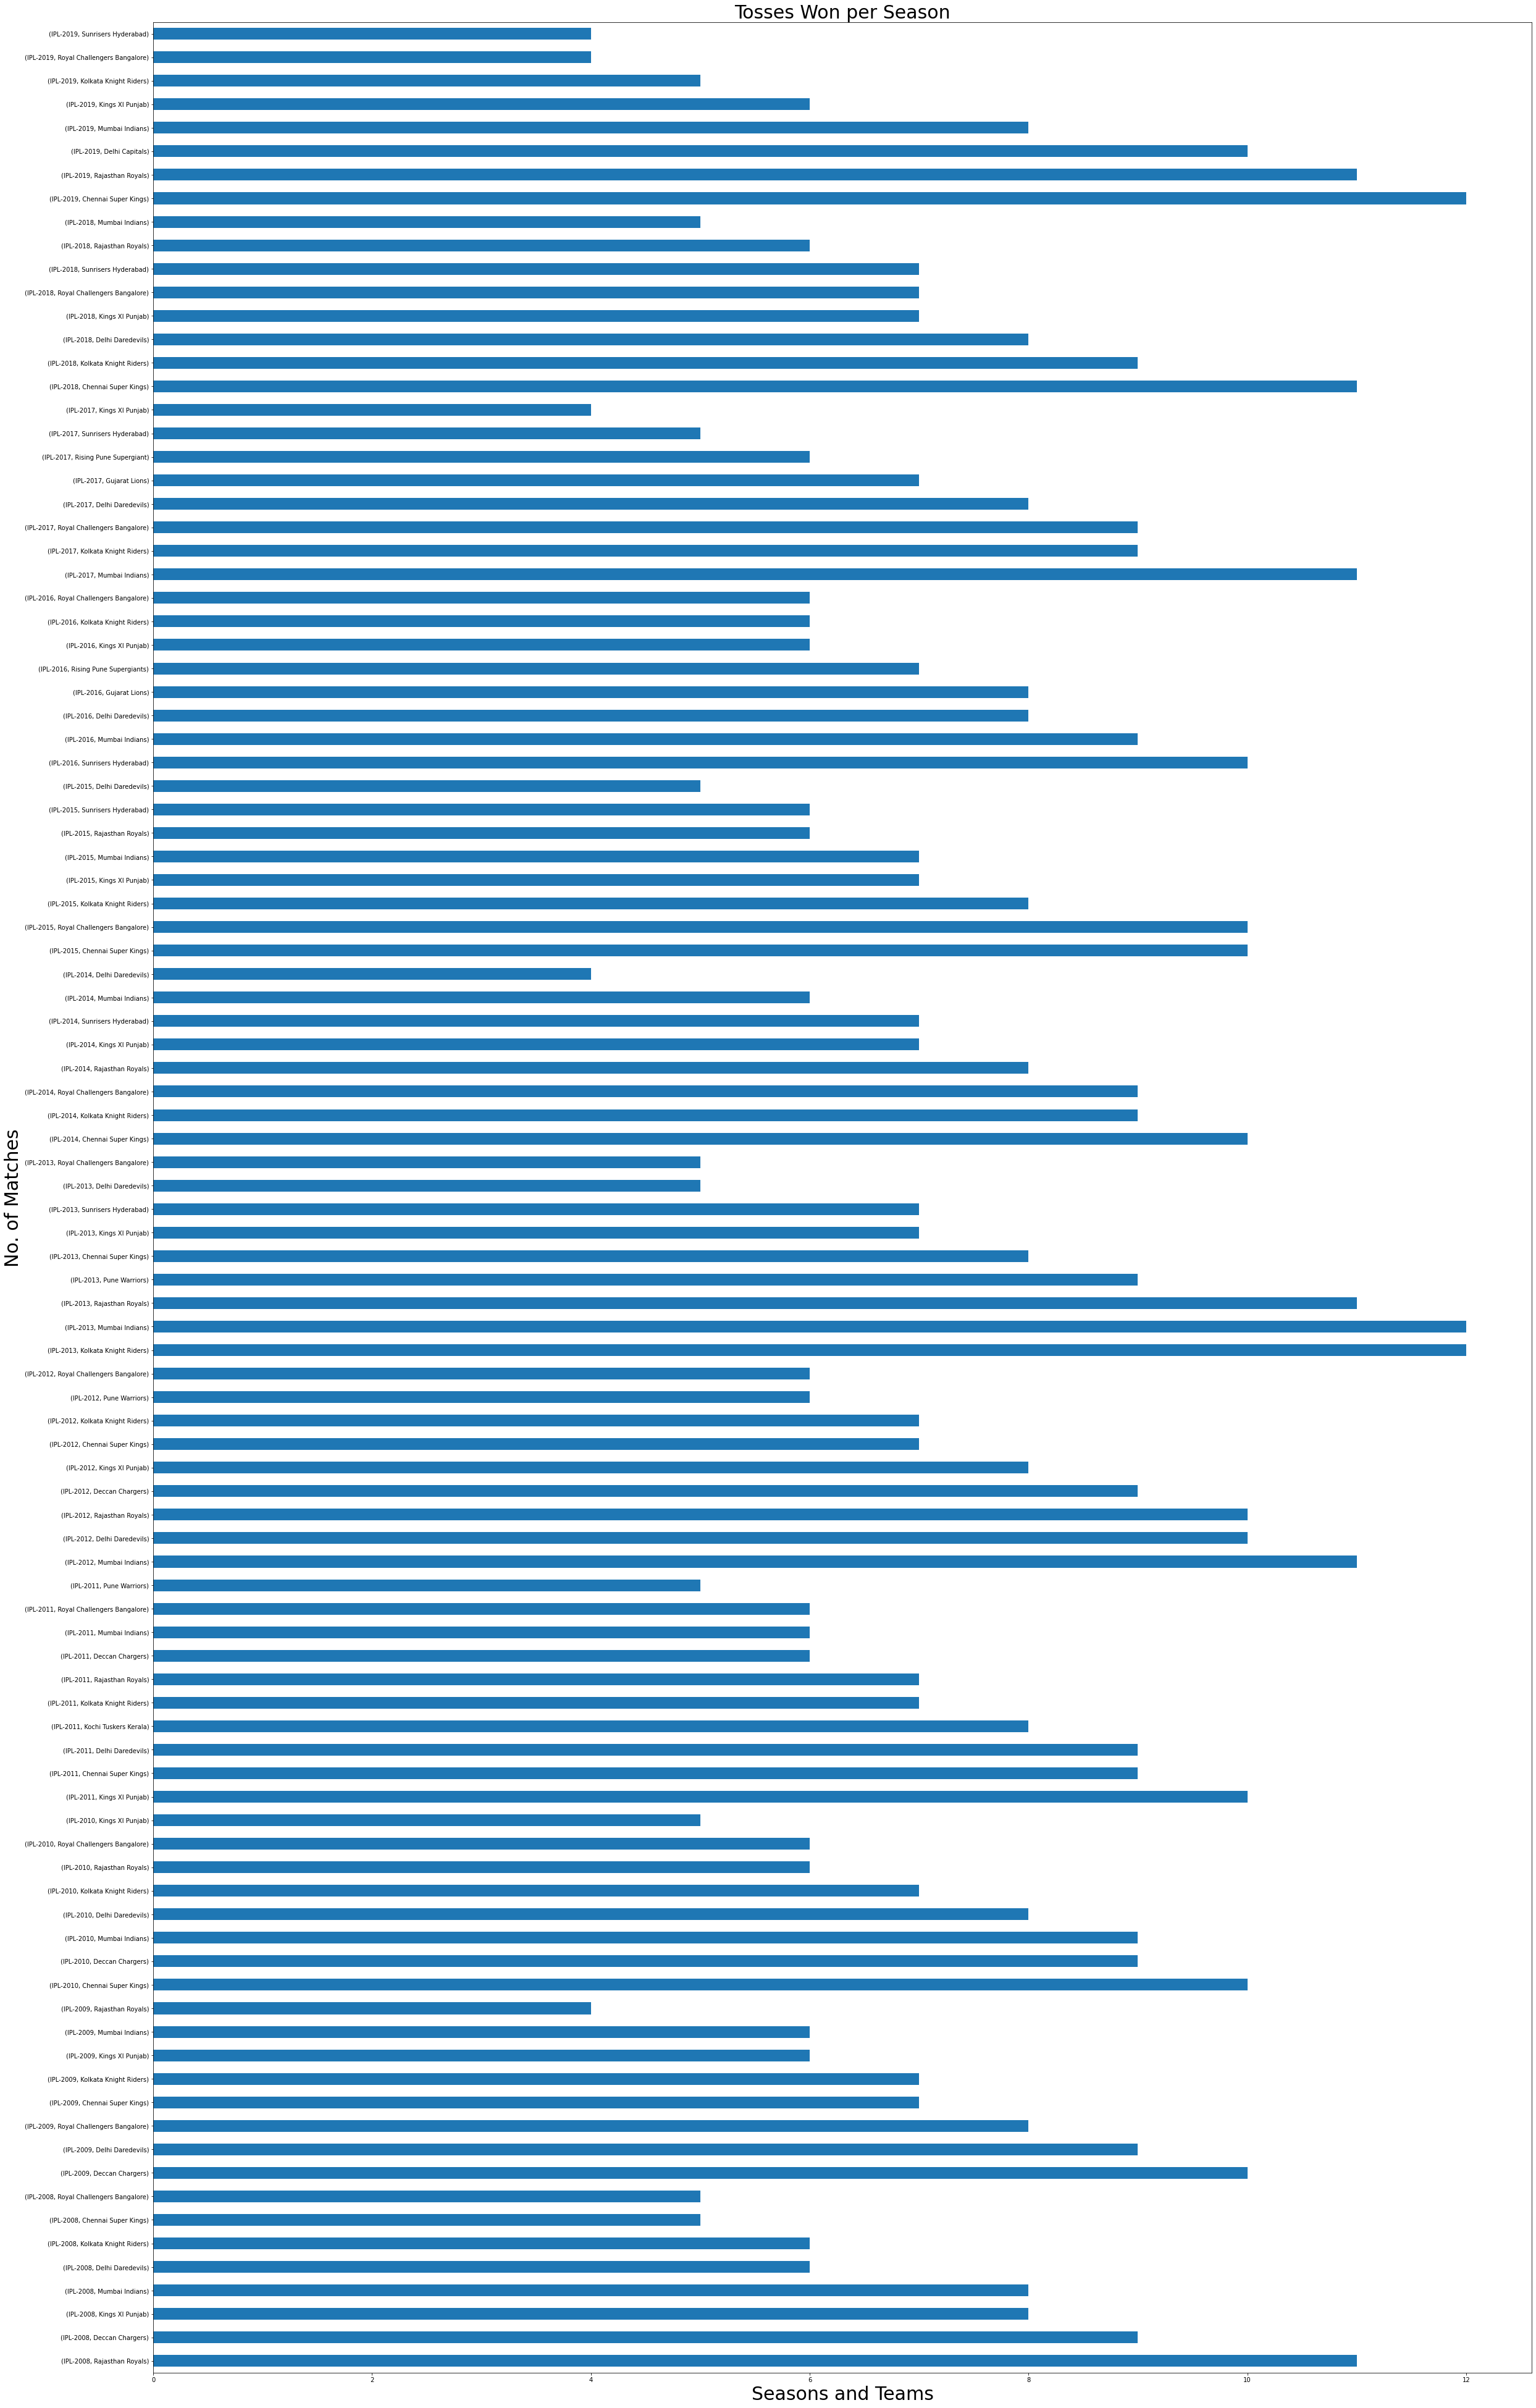

In [58]:
matches_df.groupby('Season').toss_winner.value_counts().plot(kind ='barh', figsize = (40, 70))
plt.title('Tosses Won per Season', size = 30)
plt.xlabel('Seasons and Teams', size = 30)
plt.ylabel('No. of Matches', size = 30);

#Double Click on the graph below to zoom